<u><font size='5'>__Threatened Species: A Global Perspective__</font></u>


This project analyzes global data on threatened species to explore biodiversity patterns across countries and over time. Using a cleaned dataset, we visualize trends through time series plots, country-wise comparisons, species type breakdowns, and a geospatial map. These visualizations help identify regions and species groups most at risk, providing insights into the state of global biodiversity. The goal of this analysis is to present clear, data-driven perspectives on conservation urgency and species vulnerability worldwide.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("data/cleaned_ThreatenedSpecies.csv")

__1) Global Trend Over Years__

The line graph displays the total number of threatened species worldwide for each recorded year. The x-axis represents the years, and the y-axis shows the summed count of threatened species across all countries. The line steadily rises, indicating that the reported number of threatened species has increased year by year in the dataset.

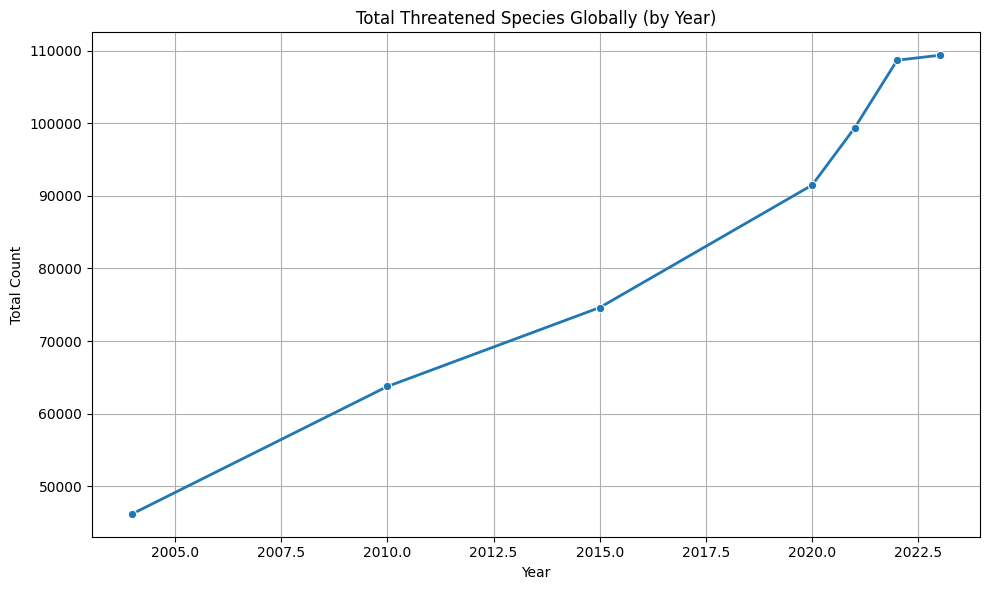

In [2]:
# Group by year and sum the count across all countries
yearly_trend = df.groupby("Year")["Count"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x="Year", y="Count", marker="o", linewidth=2)
plt.title("Total Threatened Species Globally (by Year)")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.grid(True)
plt.tight_layout()
plt.show()


__2) Global Comparison by Species Type__

The bar chart shows the total number of threatened species globally, grouped by species type. Each bar represents a specific category (vertebrates, invertebrates, or plants), and its length indicates the cumulative count of threatened species across all countries and years. The chart clearly highlights which species groups are most affected worldwide.



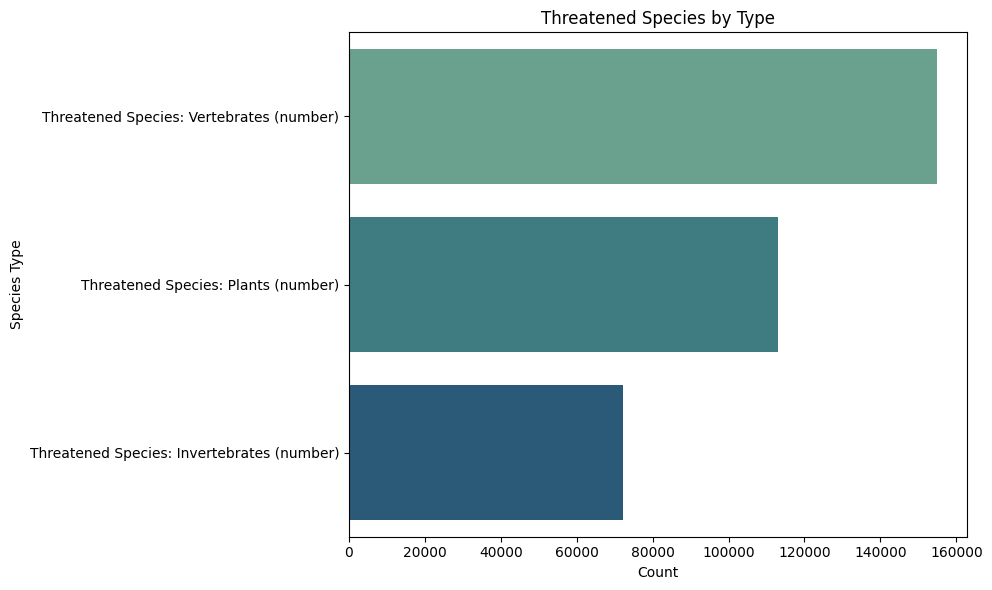

In [3]:
df = df[df["Species_Type"].isin([
    "Threatened Species: Vertebrates (number)",
    "Threatened Species: Invertebrates (number)",
    "Threatened Species: Plants (number)"
]) == True]

summary = df.groupby("Species_Type")["Count"].sum().reset_index().sort_values("Count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x="Count", y="Species_Type", hue="Species_Type", palette="crest", legend=False)
plt.title("Threatened Species by Type")
plt.xlabel("Count")
plt.ylabel("Species Type")
plt.tight_layout()
plt.show()

__3) Top 10 Countries with Most Threatened Species (2023)__

The bar chart displays the top 10 countries with the highest number of threatened species in 2021. Each bar represents a country, and the length of the bar corresponds to the total number of species reported as threatened in that year. The chart clearly shows which countries had the highest biodiversity risk, with noticeable differences in species counts among them.

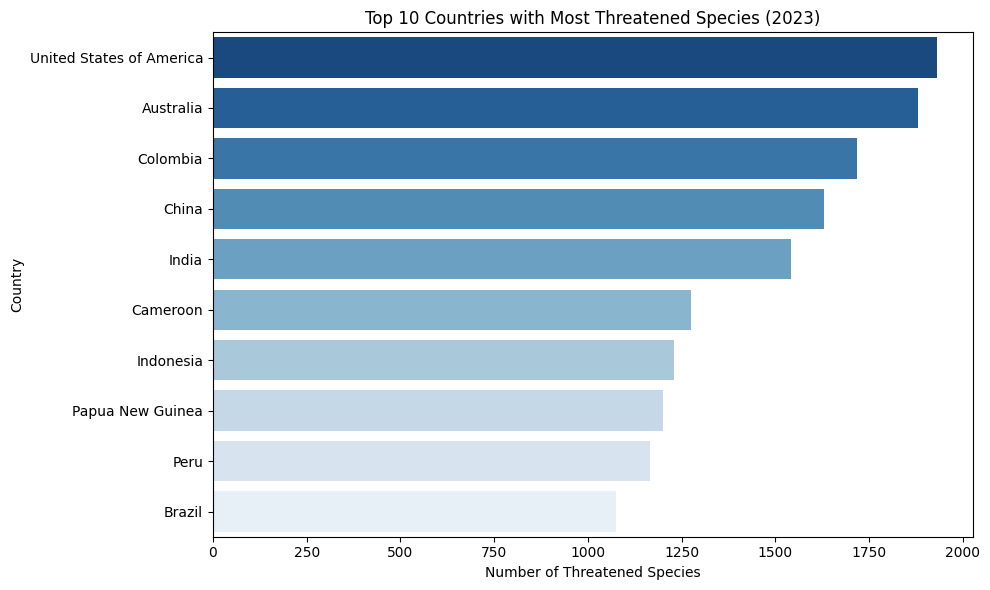

In [4]:
# Find the most recent year in the dataset
latest_year = df["Year"].max()

# Filter data for that year and aggregate counts by country
top_countries = (
    df[df["Year"] == latest_year]
    .groupby("Country")["Count"]
    .sum()
    .nlargest(10)
    .reset_index()
)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x="Count", y="Country", hue="Country", palette="Blues_r", dodge=False, legend=False)
plt.title(f"Top 10 Countries with Most Threatened Species ({int(latest_year)})")
plt.xlabel("Number of Threatened Species")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


__4) Country-Specific Time Series (India)__

The line graph shows the trend in the number of threatened species in India over the years. The x-axis represents the years, and the y-axis shows the total count of threatened species reported in each year. The plot highlights how this number has changed over time, revealing periods of increase or stability in the country’s biodiversity threat levels.



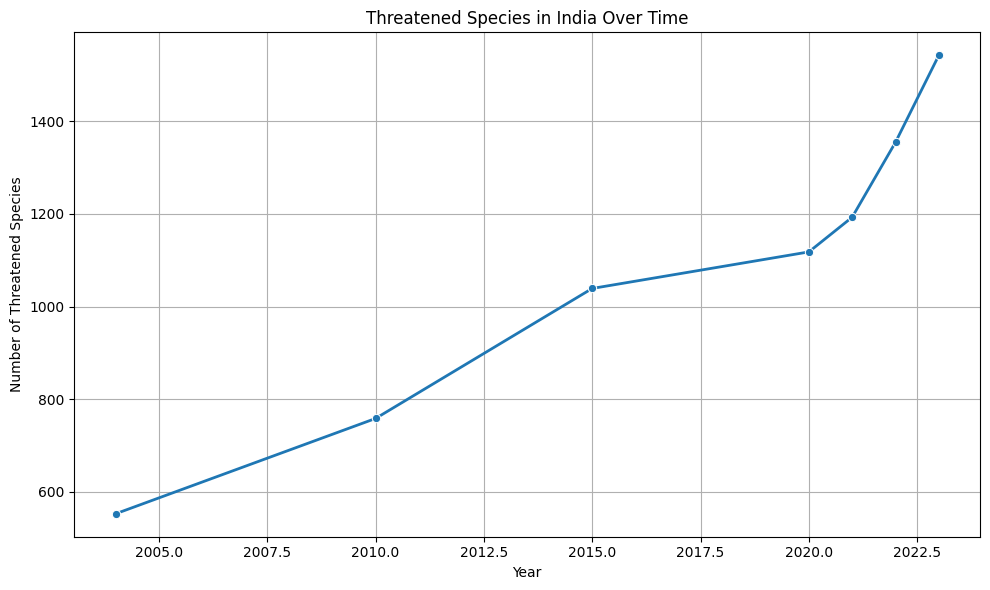

In [5]:
# Filter data for India
india_data = df[df["Country"] == "India"]

# Group by year and sum counts
india_trend = india_data.groupby("Year")["Count"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=india_trend, x="Year", y="Count", marker="o", linewidth=2)
plt.title("Threatened Species in India Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Threatened Species")
plt.grid(True)
plt.tight_layout()
plt.show()

__5) Interactive Map of Threatened Vertebrate Species by Country (2021)__

This interactive choropleth map displays the number of threatened vertebrate species across different countries in the year 2021. The data is visualized using a red color scale — the deeper the red, the higher the count of threatened species. Users can hover over each country to view exact numbers. This map helps identify biodiversity hotspots and areas with critical conservation needs. The data is based on IUCN sources and is filtered specifically for vertebrates in this visualization.



In [3]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("data/cleaned_ThreatenedSpecies.csv")

# Filter for the most recent year or a specific year
year_filter = 2021
filtered_df = df[df["Year"] == year_filter]

# Create the choropleth map
fig = px.choropleth(
    filtered_df,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    color_continuous_scale="Reds",
    title=f"Threatened Vertebrate Species by Country in {year_filter}"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    template="plotly_white"
)

fig.show()


__6)Sunburst Chart: Threatened Species by Type and Country (2021)__

This interactive sunburst chart visualizes the distribution of threatened vertebrate species in 2021. At the center is the species type, branching out to countries with corresponding data. The size of each segment represents the number of species under threat in that category and region. Users can click to zoom into specific segments and explore details interactively. It’s a clean and insightful way to observe biodiversity challenges across different nations.


In [10]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("data/cleaned_ThreatenedSpecies.csv")

# Filter for a specific year to simplify
year_filter = 2021
filtered_df = df[df["Year"] == year_filter]

# Build a sunburst chart
fig = px.sunburst(
    filtered_df,
    path=["Species_Type", "Country"],
    values="Count",
    title=f"Threatened Species Breakdown by Type and Country - {year_filter}",
    color="Species_Type"
)

fig.update_layout(template="plotly_white")

fig.show()
